In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data_df = pd.read_csv("train.csv")

In [67]:
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [69]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
data_df.shape

(1460, 81)

In [71]:
## Dropping id column - we already have index provided by pandas and also it doesn't help us in prediction.
data_df = data_df.drop("Id", axis=1)

In [72]:
data_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
print("Number of null records -- ", data_df.Alley.isnull().sum())
print("Number of null records -- ", data_df.PoolQC.isnull().sum())
print("Number of null records -- ", data_df.Fence.isnull().sum())
print("Number of null records -- ", data_df.MiscFeature.isnull().sum())
print("Number of null records -- ", data_df.FireplaceQu.isnull().sum())



Number of null records --  1369
Number of null records --  1453
Number of null records --  1179
Number of null records --  1406
Number of null records --  690


In [74]:
# removing the the above column since most of the entries are NaN
data_df = data_df.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis=1)

In [75]:
# removing LandSlope since LandContour has similar information
data_df = data_df.drop(["LandSlope"], axis=1)

In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Visualizing some Categorical Values

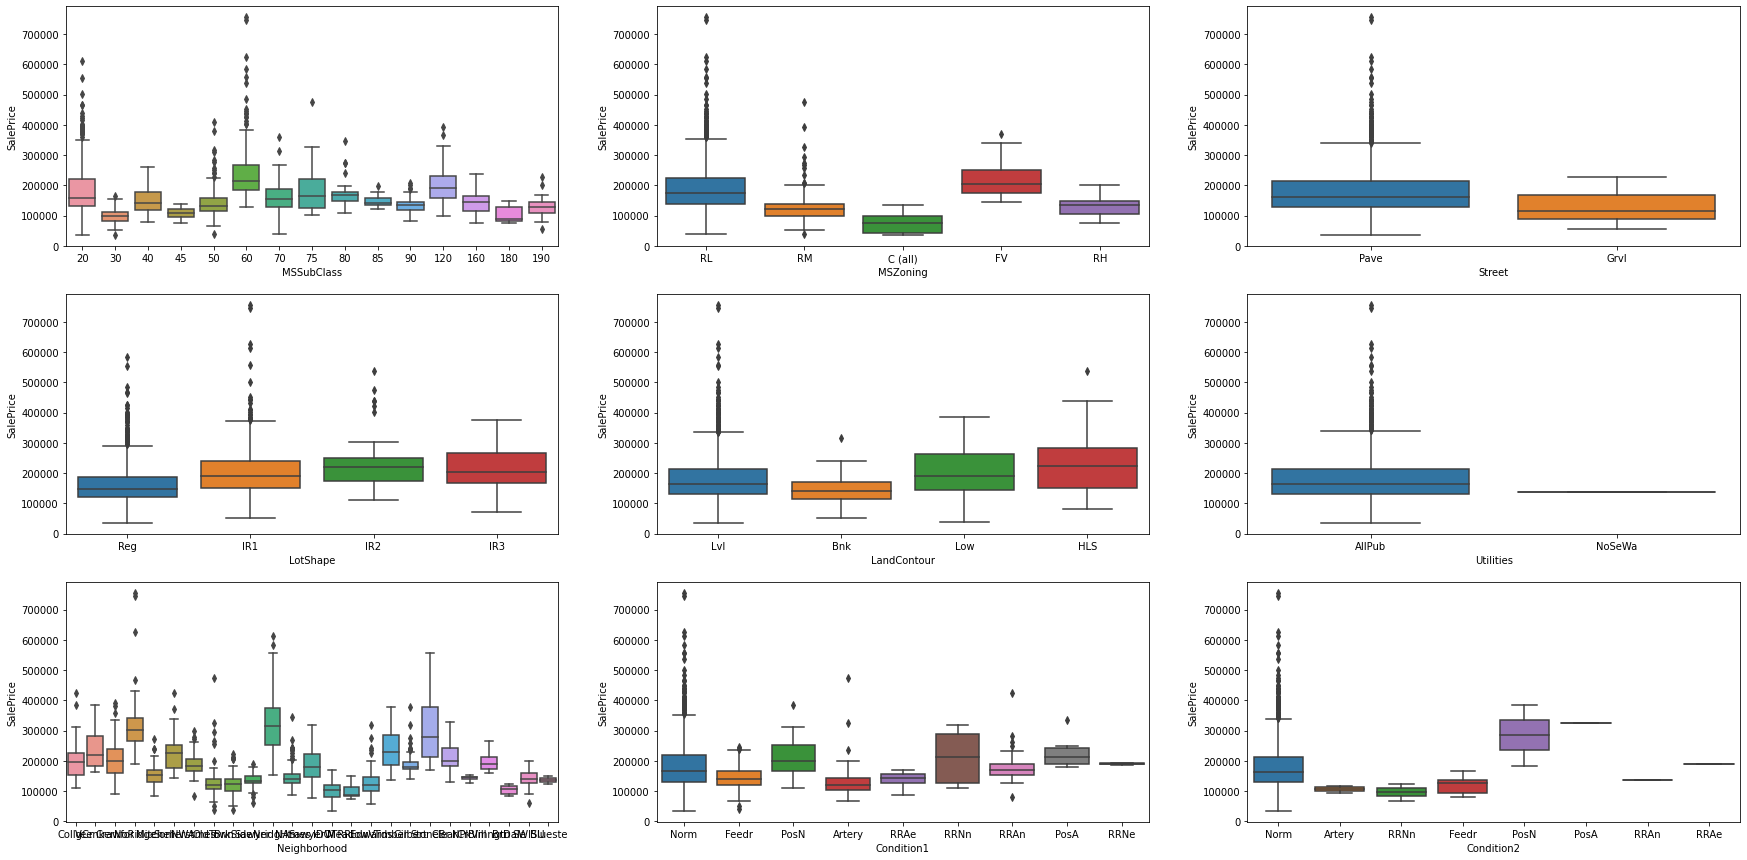

In [77]:
plt.figure(figsize=(30, 15))



plt.subplot(3, 3, 1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=data_df)


plt.subplot(3, 3, 2)
sns.boxplot(x="MSZoning", y="SalePrice", data=data_df)



plt.subplot(3, 3, 3)
sns.boxplot(x="Street", y="SalePrice", data=data_df)



plt.subplot(3, 3, 4)
sns.boxplot(x="LotShape", y="SalePrice", data=data_df)



plt.subplot(3, 3, 5)
sns.boxplot(x="LandContour", y="SalePrice", data=data_df)



plt.subplot(3, 3, 6)
sns.boxplot(x="Utilities", y="SalePrice", data=data_df)


plt.subplot(3, 3, 7)
sns.boxplot(x="Neighborhood", y="SalePrice", data=data_df)


plt.subplot(3, 3, 8)
sns.boxplot(x="Condition1", y="SalePrice", data=data_df)

plt.subplot(3, 3, 9)
sns.boxplot(x="Condition2", y="SalePrice", data=data_df)


plt.show()



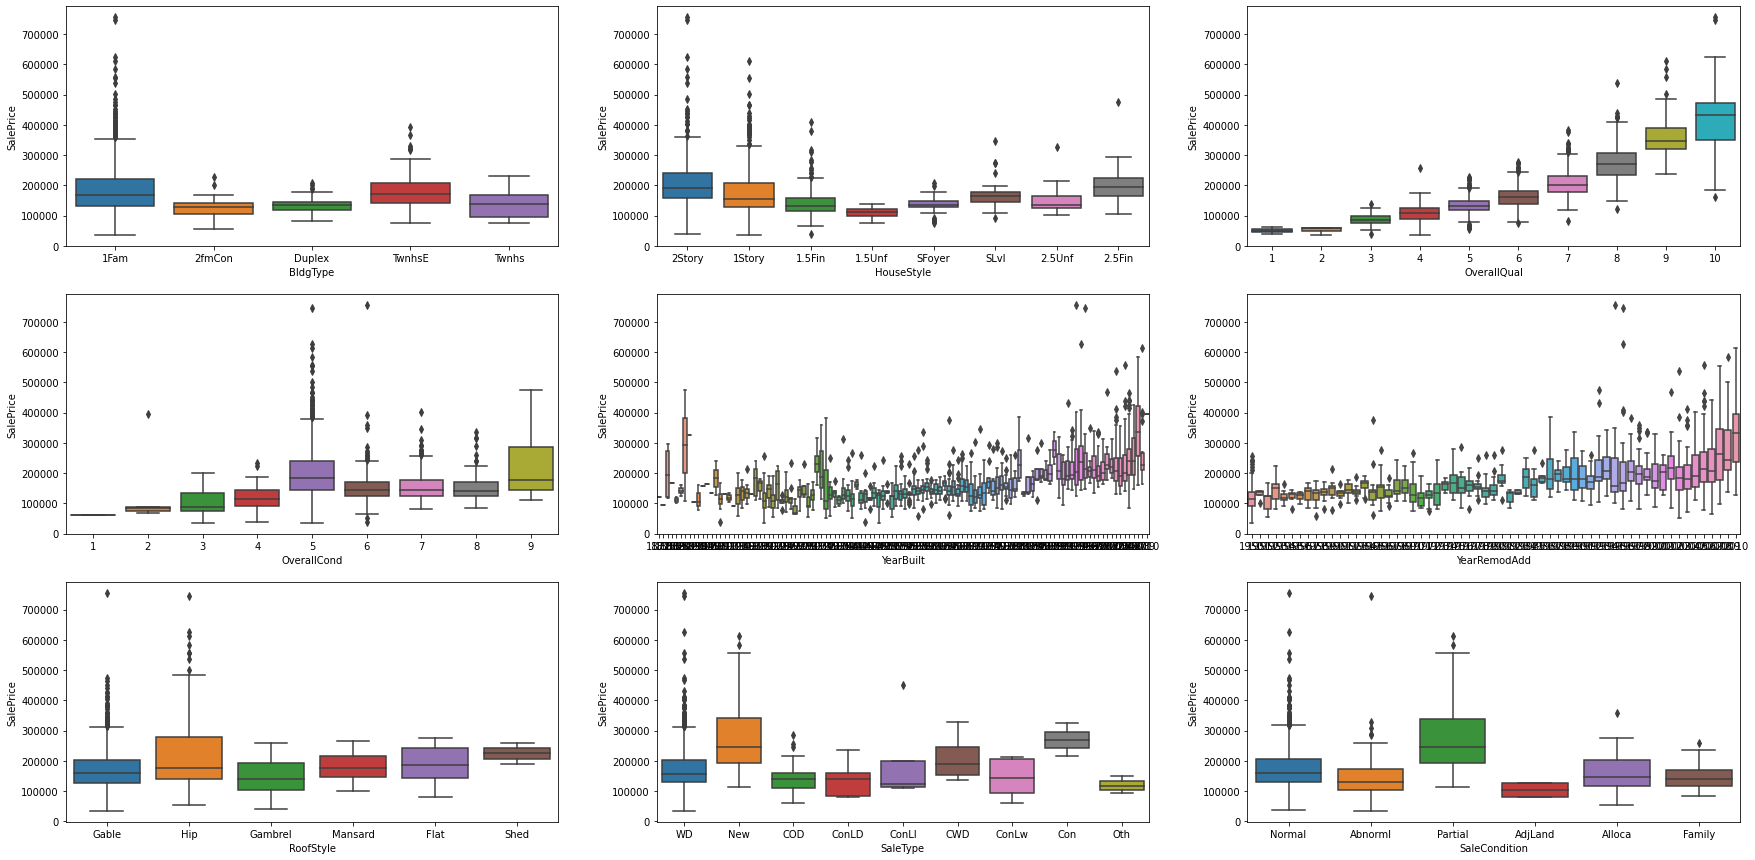

In [78]:
plt.figure(figsize=(30, 15))



plt.subplot(3, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=data_df)


plt.subplot(3, 3, 2)
sns.boxplot(x="HouseStyle", y="SalePrice", data=data_df)



plt.subplot(3, 3, 3)
sns.boxplot(x="OverallQual", y="SalePrice", data=data_df)



plt.subplot(3, 3, 4)
sns.boxplot(x="OverallCond", y="SalePrice", data=data_df)



plt.subplot(3, 3, 5)
sns.boxplot(x="YearBuilt", y="SalePrice", data=data_df)



plt.subplot(3, 3, 6)
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=data_df)


plt.subplot(3, 3, 7)
sns.boxplot(x="RoofStyle", y="SalePrice", data=data_df)


plt.subplot(3, 3, 8)
sns.boxplot(x="SaleType", y="SalePrice", data=data_df)

plt.subplot(3, 3, 9)
sns.boxplot(x="SaleCondition", y="SalePrice", data=data_df)


plt.show()

# Plotting floating continuous variables v/s Predicted variable

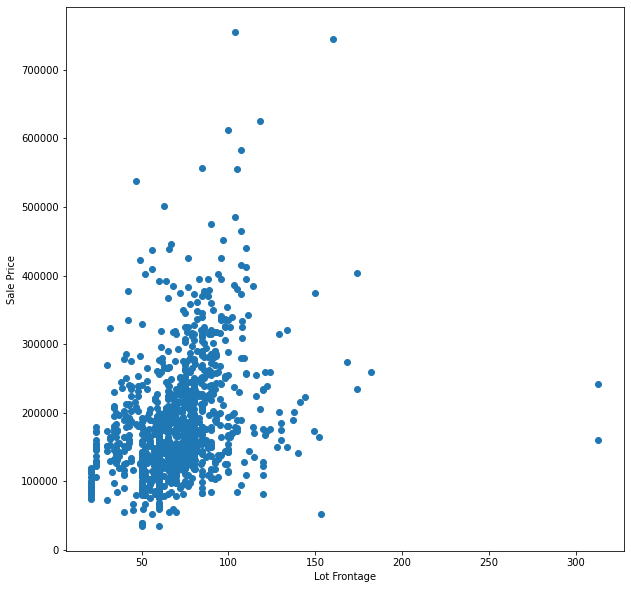

In [79]:
plt.figure(figsize=(10, 10))
plt.scatter(data_df.LotFrontage, data_df.SalePrice)
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

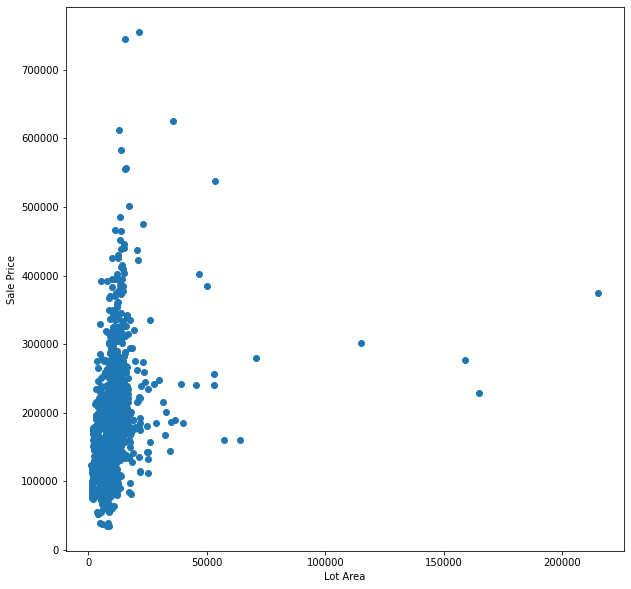

In [80]:
plt.figure(figsize=(10, 10))
plt.scatter(data_df.LotArea, data_df.SalePrice)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

In [81]:
data_df.shape

(1460, 74)

In [82]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [83]:
data_df_2 = data_df[["MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "FullBath", "HalfBath", "Fireplaces", "GarageArea", "PoolArea", "SalePrice"]]

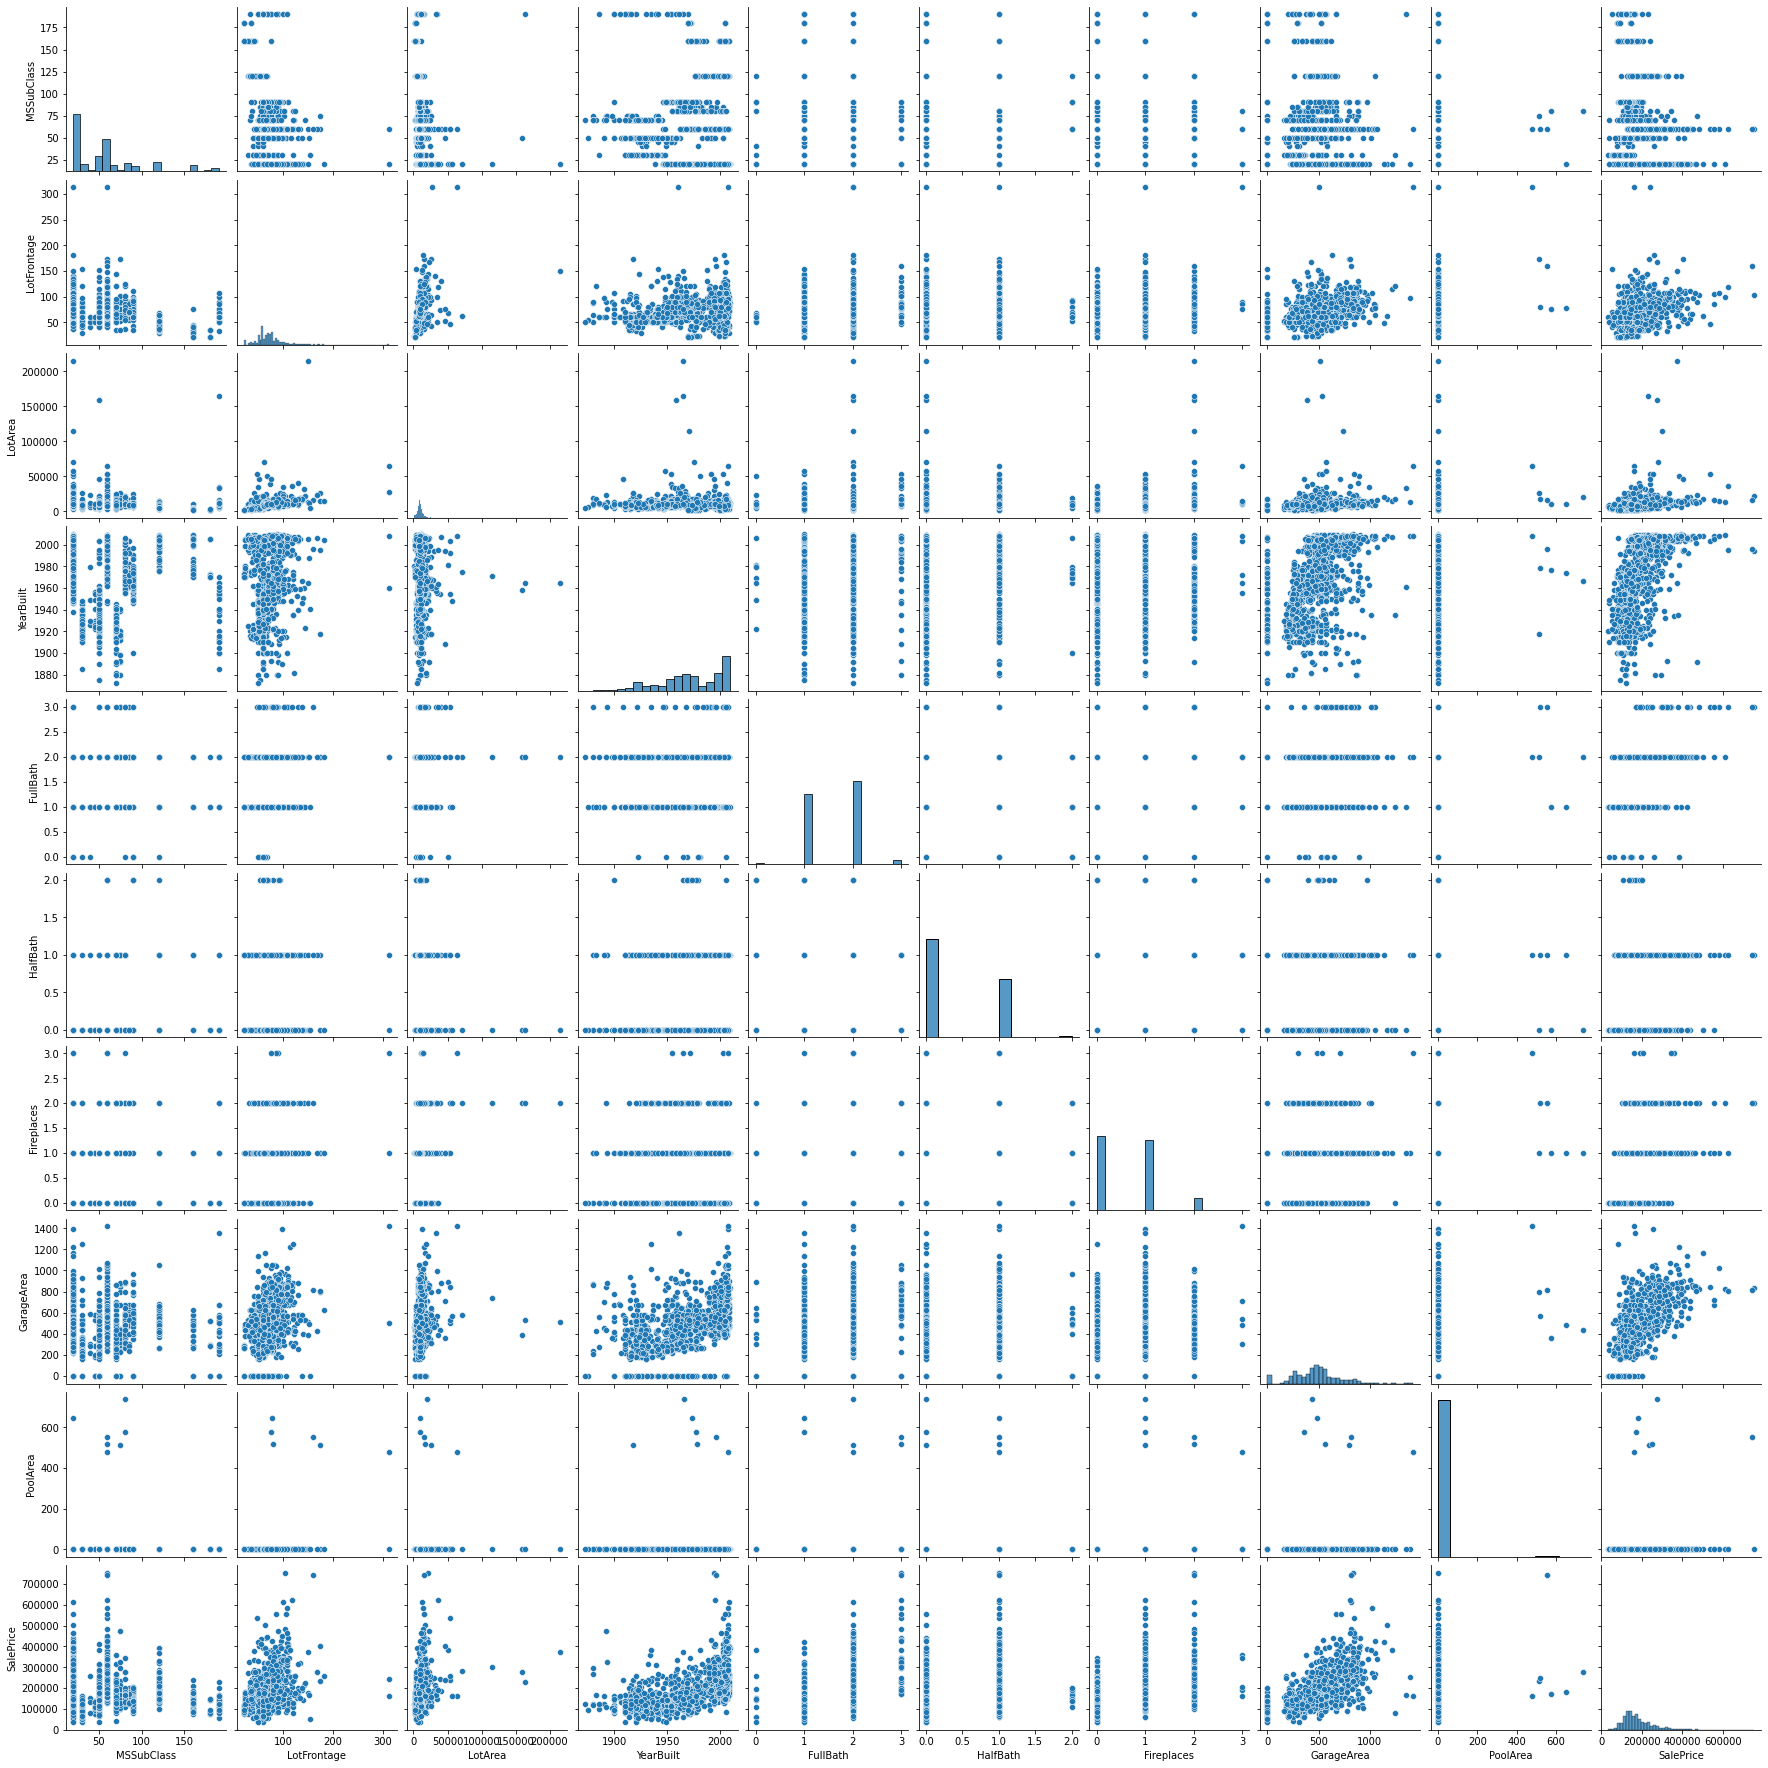

In [84]:
sns.pairplot(data_df_2)
plt.show()

In [85]:
# List of categorical variables
data_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   Neighborhood   1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  RoofStyle      1460 non-null   object
 12  RoofMatl       1460 non-null   object
 13  Exterior1st    1460 non-null   object
 14  Exterior2nd    1460 non-null   object
 15  MasVnrType     1452 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

### Fixing Null values for categorical variables

In [86]:
print(data_df.GarageType.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageFinish.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageQual.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageCond.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtQual.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtCond.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtExposure.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtFinType1.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtFinType2.value_counts(dropna=False))

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
__________________________________________________
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
__________________________________________________
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64
__________________________________________________
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64
__________________________________________________
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
__________________________________________________
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
__________________________________________________
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
______________

In [87]:
# Replacing NaN with the most repeated categorical value
data_df.GarageType.fillna("Attchd", inplace=True)
data_df.GarageFinish.fillna("Unf", inplace=True)
data_df.GarageQual.fillna("TA", inplace=True)
data_df.GarageCond.fillna("TA", inplace=True)
data_df.BsmtQual.fillna("TA", inplace=True)
data_df.BsmtCond.fillna("TA", inplace=True)
data_df.BsmtExposure.fillna("No", inplace=True)
data_df.BsmtFinType1.fillna("Unf", inplace=True)
data_df.BsmtFinType2.fillna("Unf", inplace=True)


In [88]:
print(data_df.GarageType.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageFinish.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageQual.value_counts(dropna=False))
print("_"*50)
print(data_df.GarageCond.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtQual.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtCond.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtExposure.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtFinType1.value_counts(dropna=False))
print("_"*50)
print(data_df.BsmtFinType2.value_counts(dropna=False))

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
__________________________________________________
Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
__________________________________________________
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
__________________________________________________
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
__________________________________________________
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
__________________________________________________
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
__________________________________________________
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
__________________________________________________
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Nam

In [89]:
data_df.shape

(1460, 74)

### Dropping categorical columns that are very similar

In [90]:
# Dropping GarageCond column since GarageQual has same categories and is correlated
data_df = data_df.drop("GarageCond", axis=1)

# Dropping BsmtCond column since BsmtQual has same categories and is correlated
data_df = data_df.drop("BsmtCond", axis=1)

# since no difference is given between BsmtFinType1 and BsmtFinType2, we will drop BsmtFinType2 column, since they have same categorical values
data_df = data_df.drop("BsmtFinType2", axis=1)


In [91]:
data_df.shape

(1460, 71)

### Listing all numerical variables and replacing missing/NaN values with column average

In [92]:
# List of Integer continuous variables
data_df.select_dtypes(include='int64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtFinSF2     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  LowQualFinSF   1460 non-null   int64
 13  GrLivArea      1460 non-null   int64
 14  BsmtFullBath   1460 non-null   int64
 15  BsmtHalfBath   1460 non-null   int64
 16  FullBath       1460 non-null   int64
 17  HalfBath       1460 non-null   int64
 18  BedroomAbvGr   1460 non-null   int64
 19  Kitche

In [93]:
numerical_columns_list = list(data_df.select_dtypes(include='int64').columns)
print(numerical_columns_list)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


There are no null values in the Integer columns

In [94]:
# List of Float continuous variables
data_df.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
 2   GarageYrBlt  1379 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [95]:
float_var_list = list(data_df.select_dtypes(include='float64').columns)

for each in float_var_list:
    numerical_columns_list.append(each)

print(numerical_columns_list)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [96]:
# For the above columns null values will be replaced with column average
print(data_df.LotFrontage.describe())
print("_"*50)
print(data_df.MasVnrArea.describe())
print("_"*50)
print(data_df.GarageYrBlt.describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
__________________________________________________
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
__________________________________________________
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [97]:
# Replacing the null values with average
data_df.LotFrontage.fillna(70.0, inplace=True)
data_df.MasVnrArea.fillna(103.0, inplace=True)
data_df.GarageYrBlt.fillna(1978.0, inplace=True)

In [98]:
data_df.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
 2   GarageYrBlt  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [99]:
data_df = data_df.drop("OverallCond", axis=1)


In [100]:
numerical_columns_list.remove("OverallCond")

In [101]:
numerical_columns_list

['MSSubClass',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [102]:
data_df.shape

(1460, 70)

## Creating Dummy variables for Categorical values in the dataset

In [103]:
categorical_variables_list = list(data_df.select_dtypes(include='object').columns)
print(categorical_variables_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


In [104]:
# entire_list = {}
for category in categorical_variables_list:
    x = pd.get_dummies(data_df[category], drop_first=True)
    data_df = pd.concat([data_df, x], axis=1)
    data_df = data_df.drop(category, axis=1)
    # entire_list[f"{category}"] = list(x.columns)


In [105]:
data_df.shape

(1460, 218)

In [106]:
data_df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [107]:
data_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=218)

## Dataset Split and rescaling features


In [108]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [109]:
df_train, df_test = train_test_split(data_df, train_size=0.8, random_state=42)
print(df_train.shape)
print(df_test.shape)


(1168, 218)
(292, 218)


In [110]:
scaler = MinMaxScaler()

# fit and transform on data
# numerical_columns_list.remove("SalePrice")
# print(numerical_columns_list)

df_train[numerical_columns_list] = scaler.fit_transform(df_train[numerical_columns_list])

df_test[numerical_columns_list] = scaler.fit_transform(df_test[numerical_columns_list])

In [111]:
# First proceeding without data transformation
y_train = df_train.pop("SalePrice")
x_train = df_train

y_test = df_test.pop("SalePrice")
x_test = df_test

In [112]:
x_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
254,0.000000,0.167808,0.033186,0.444444,0.615942,0.116667,0.000000,0.163359,0.0,0.167808,...,0,0,0,0,1,0,0,0,1,0
1066,0.235294,0.130137,0.030555,0.555556,0.876812,0.733333,0.000000,0.000000,0.0,0.342038,...,0,0,0,0,1,0,0,0,1,0
638,0.058824,0.157534,0.034948,0.444444,0.275362,0.000000,0.000000,0.000000,0.0,0.340753,...,0,0,0,0,1,0,0,0,1,0
799,0.176471,0.133562,0.027577,0.444444,0.471014,0.000000,0.182874,0.100815,0.0,0.069349,...,0,0,0,0,1,0,0,0,1,0
380,0.176471,0.099315,0.017294,0.444444,0.376812,0.000000,0.000000,0.038625,0.0,0.345890,...,0,0,0,0,1,0,0,0,1,0


In [113]:
y_train.head()

254     0.155049
1066    0.201521
638     0.070553
799     0.197296
380     0.129700
Name: SalePrice, dtype: float64

In [114]:
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
892,0.000000,0.320261,0.099942,0.500,0.643411,0.883333,0.00000,0.303016,0.0,0.193928,...,0,0,0,0,1,0,0,0,1,0
1105,0.235294,0.503268,0.155406,0.750,0.883721,0.750000,0.22625,0.471664,0.0,0.211068,...,0,0,0,0,1,0,0,0,1,0
413,0.058824,0.228758,0.107824,0.375,0.364341,0.000000,0.00000,0.000000,0.0,0.493634,...,0,0,0,0,1,0,0,0,1,0
522,0.176471,0.189542,0.050657,0.500,0.519380,0.000000,0.00000,0.182358,0.0,0.296278,...,0,0,0,0,1,0,0,0,1,0
1036,0.000000,0.444444,0.164674,0.875,0.984496,0.966667,0.04375,0.467093,0.0,0.292850,...,0,0,0,0,1,0,0,0,1,0


In [115]:
y_test.head()

892     0.165612
1105    0.402520
413     0.110727
522     0.171865
1036    0.389320
Name: SalePrice, dtype: float64

## Building model and fitting data - Linear Regression

In [116]:
# Building LinearRegression model
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [117]:
# prediction
y_pred = reg.predict(x_train)

# R-Squared value
print(r2_score(y_train, y_pred))


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.9282830750376826
rss -->  0.9908392195234126
mse -->  0.0008483212495919628
rmse -->  0.02912595491296316


In [118]:
# predcition
y_pred = reg.predict(x_test)

# R-Squared value
print(r2_score(y_test, y_pred))

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

-1.102046242423634e+22
rss -->  4.76548134892951e+22
mse -->  1.632014160592298e+20
rmse -->  12775030961.184782


In [119]:
# intercept and co-efficient of the model
# print(reg.intercept_)
# print(reg.coef_)

In [124]:
# Residual analysis
# y_res = y_train - y_pred


ValueError: operands could not be broadcast together with shapes (1168,) (292,) 

In [121]:
# df_train["res"] = y_res
# data_df.res.describe()


In [122]:
# plt.figure(figsize=(10, 10))
# plt.scatter(y_pred, df_train["res"])
# plt.axhline(y=0, color='r', linestyle=":")
# plt.xlabel("Predictions")
# plt.ylabel("Residual")
# plt.show()

In [125]:
# Distribution of errors
# plt.figure(figsize=(10, 20))
# p = sns.displot(y_res, kde=True)
# p = plt.title("Normality of error terms/residuals")
# plt.xlabel("Residuals")
# plt.show()

In [126]:
pd.set_option('display.max_rows', None)

In [127]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
14,GrLivArea,inf
116,CBlock,inf
7,BsmtFinSF1,inf
8,BsmtFinSF2,inf
9,BsmtUnfSF,inf
10,TotalBsmtSF,inf
11,1stFlrSF,inf
12,2ndFlrSF,inf
13,LowQualFinSF,inf
130,CBlock,inf


In [128]:
## Dropping  columns with infinite VIF
x_train_2 = x_train.drop(
    ["2ndFlrSF",
    "BsmtUnfSF",
    "CBlock",
    "LowQualFinSF",
    "1stFlrSF",
    "TotalBsmtSF",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "GrLivArea",
    "CBlock"], axis=1)

x_test_2 = x_test.drop(
    ["2ndFlrSF",
    "BsmtUnfSF",
    "CBlock",
    "LowQualFinSF",
    "1stFlrSF",
    "TotalBsmtSF",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "GrLivArea",
    "CBlock"], axis=1)

In [129]:
print(x_train_2.shape)
print(x_test_2.shape)

(1168, 206)
(292, 206)


In [130]:
# Building LinearRegression model
reg_2 = LinearRegression()
reg_2.fit(x_train_2, y_train)

# prediction
y_pred = reg_2.predict(x_train_2)

# R squared value
r2score = r2_score(y_train, y_pred)
print("Train R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_2.predict(x_test_2)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

Train R2 score 0.9076781705559855
rss -->  1.2755160581598495
mse -->  0.0010920514196574053
rmse -->  0.033046201289367666
__________________________________________________
Test R2 score -1.9837290083569016e+23
rss -->  8.578064355870548e+23
mse -->  2.9376932725584067e+21
rmse -->  54200491442.03774


In [131]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
98,CompShg,1626.50
157,GasA,1113.70
93,Gable,963.03
76,Norm,871.03
141,TA,546.07
190,TA,454.37
31,Pave,443.71
29,RL,356.91
95,Hip,249.56
180,Attchd,184.04


In [132]:
vif_score_lst = vif.VIF

feature_greater_than_400_vif_list = []

for i in vif_score_lst:
    if i > 400:
        feature_greater_than_400_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_400_vif_list)

['CompShg', 'GasA', 'Gable', 'Norm', 'TA', 'TA', 'Pave']


In [133]:
## Dropping second set of columns which are highly correlated and do not aid in our prediction

## Dropping  columns with infinite VIF
x_train_3 = x_train_2.drop(feature_greater_than_400_vif_list, axis=1)
x_test_3 = x_test_2.drop(feature_greater_than_400_vif_list, axis=1)

In [134]:
print(x_train_3.shape)
print(x_test_3.shape)

(1168, 194)
(292, 194)


In [135]:
from sklearn.metrics import r2_score

In [136]:
# Building LinearRegression model
reg_3 = LinearRegression()
reg_3.fit(x_train_3, y_train)

# prediction
y_pred = reg_3.predict(x_train_3)

# R squared value
r2score = r2_score(y_train, y_pred)
print("Train R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_3.predict(x_test_3)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

Train R2 score 0.8832199222578513
rss -->  1.6134305974037828
mse -->  0.0013813618128457044
rmse -->  0.03716667610704116
__________________________________________________
Test R2 score -1.0715394568547297e+23
rss -->  4.633563547254796e+23
mse -->  1.5868368312516424e+21
rmse -->  39835120575.33707


In [137]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
29,RL,266.55
110,VinylSd,174.34
169,Attchd,151.59
124,VinylSd,149.57
4,YearBuilt,139.97
168,Typ,136.64
186,New,134.44
193,Partial,133.59
106,MetalSd,91.70
0,MSSubClass,88.13


In [138]:
vif_score_lst = vif.VIF

feature_greater_than_150_vif_list = []

for i in vif_score_lst:
    if i > 150:
        feature_greater_than_150_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_150_vif_list)

# vif.loc[vif.VIF == 1107.60, 'Features'].item()

['RL', 'VinylSd', 'Attchd']


In [139]:
x_train_4 = x_train_3.drop(feature_greater_than_150_vif_list, axis=1)
x_test_4 = x_test_3.drop(feature_greater_than_150_vif_list, axis=1)

In [140]:
print(x_train_4.shape)
print(x_test_4.shape)

(1168, 190)
(292, 190)


In [141]:
# Building LinearRegression model
reg_final = LinearRegression()
reg_final.fit(x_train_4, y_train)

# prediction
y_pred = reg_final.predict(x_train_4)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_final.predict(x_test_4)

# R squared value
r2score = r2_score(y_test, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8825845395140617
rss -->  1.6222090293051212
mse -->  0.0013888775935831518
rmse -->  0.03726764808225966
__________________________________________________
-6.41710830253941e+22
rss -->  2.7748935346450624e+23
mse -->  9.503060050154323e+20
rmse -->  30827033672.013145


In [142]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
182,New,134.14
189,Partial,133.29
4,YearBuilt,132.43
165,Typ,116.19
0,MSSubClass,86.05
12,KitchenAbvGr,78.92
3,OverallQual,65.41
15,GarageYrBlt,56.47
16,GarageCars,48.33
11,BedroomAbvGr,45.89


In [143]:
vif_score_lst = vif.VIF

feature_greater_than_100_vif_list = []

for i in vif_score_lst:
    if i > 100:
        feature_greater_than_100_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_100_vif_list)

['New', 'Partial', 'YearBuilt', 'Typ']


In [144]:
x_train_5 = x_train_4.drop(feature_greater_than_100_vif_list, axis=1)
x_test_5 = x_test_4.drop(feature_greater_than_100_vif_list, axis=1)

In [145]:
print(x_train_5.shape)
print(x_test_5.shape)

(1168, 186)
(292, 186)


In [146]:
x_train_5.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Con,ConLD,ConLI,ConLw,Oth,WD,AdjLand,Alloca,Family,Normal
254,0.000000,0.167808,0.033186,0.444444,0.116667,0.000000,0.333333,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
1066,0.235294,0.130137,0.030555,0.555556,0.733333,0.000000,0.000000,0.0,0.666667,0.5,...,0,0,0,0,0,1,0,0,0,1
638,0.058824,0.157534,0.034948,0.444444,0.000000,0.000000,0.000000,0.0,0.333333,0.0,...,0,0,0,0,0,1,0,0,0,1
799,0.176471,0.133562,0.027577,0.444444,0.000000,0.182874,0.333333,0.0,0.333333,0.5,...,0,0,0,0,0,1,0,0,0,1
380,0.176471,0.099315,0.017294,0.444444,0.000000,0.000000,0.000000,0.0,0.666667,0.0,...,0,0,0,0,0,1,0,0,0,1


In [147]:
# Building LinearRegression model
reg_5 = LinearRegression()
reg_5.fit(x_train_5, y_train)

# prediction
y_pred = reg_5.predict(x_train_5)

# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_5.predict(x_test_5)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8817805310635409
rss -->  1.6333171897013288
mse -->  0.0013983880048812746
rmse -->  0.037395026472530735
__________________________________________________
Test R2 score -1.095582851982229e+24
rss -->  4.73753227981275e+24
mse -->  1.6224425615797088e+22
rmse -->  127375137353.39832


In [148]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
0,MSSubClass,84.68
11,KitchenAbvGr,76.20
3,OverallQual,62.51
14,GarageYrBlt,49.11
15,GarageCars,48.14
10,BedroomAbvGr,45.34
104,MetalSd,44.59
12,TotRmsAbvGrd,44.50
116,MetalSd,44.18
16,GarageArea,42.74


In [149]:
vif_score_lst = vif.VIF

feature_greater_than_50_vif_list = []

for i in vif_score_lst:
    if i > 50:
        feature_greater_than_50_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_50_vif_list)

['MSSubClass', 'KitchenAbvGr', 'OverallQual']


In [150]:
x_train_6 = x_train_5.drop(feature_greater_than_50_vif_list, axis=1)
x_test_6 = x_test_5.drop(feature_greater_than_50_vif_list, axis=1)

In [151]:
print(x_train_6.shape)
print(x_test_6.shape)

(1168, 183)
(292, 183)


In [152]:
# Building LinearRegression model
reg_6 = LinearRegression()
reg_6.fit(x_train_6, y_train)

# prediction
y_pred = reg_6.predict(x_train_6)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_6.predict(x_test_6)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8665449947617547
rss -->  1.8438109735077939
mse -->  0.0015786052855374948
rmse -->  0.03973166603022701
__________________________________________________
Test R2 score -2.4867107709765494e+24
rss -->  1.0753064021351208e+25
mse -->  3.6825561716956194e+22
rmse -->  191899874197.34332


In [153]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
12,GarageCars,47.95
11,GarageYrBlt,47.84
8,BedroomAbvGr,45.00
101,MetalSd,44.43
113,MetalSd,44.08
13,GarageArea,42.61
9,TotRmsAbvGrd,40.47
121,None,38.96
149,Y,33.09
31,Lvl,33.06


In [154]:
vif_score_lst = vif.VIF

feature_greater_than_40_vif_list = []

for i in vif_score_lst:
    if i > 40:
        feature_greater_than_40_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_40_vif_list)

['GarageCars', 'GarageYrBlt', 'BedroomAbvGr', 'MetalSd', 'MetalSd', 'GarageArea', 'TotRmsAbvGrd']


In [155]:
x_train_7 = x_train_6.drop(feature_greater_than_40_vif_list, axis=1)
x_test_7 = x_test_6.drop(feature_greater_than_40_vif_list, axis=1)

In [156]:
print(x_train_7.shape)
print(x_test_7.shape)

(1168, 176)
(292, 176)


In [157]:
# Building LinearRegression model
reg_7 = LinearRegression()
reg_7.fit(x_train_7, y_train)

# prediction
y_pred = reg_7.predict(x_train_7)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_7.predict(x_test_7)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8486379020839685
rss -->  2.0912149125656083
mse -->  0.001790423726511651
rmse -->  0.042313398900486014
__________________________________________________
Test R2 score -3.8027258710419253e+24
rss -->  1.6443792026084394e+25
mse -->  5.631435625371368e+22
rmse -->  237306460623.62836


In [158]:
vif = pd.DataFrame()
X = x_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
114,None,37.42
26,Lvl,32.63
142,Y,32.13
6,FullBath,26.01
164,Y,25.46
171,WD,23.94
146,SBrkr,23.01
104,CmentBd,21.13
93,CemntBd,21.13
113,BrkFace,20.14


In [159]:
vif_score_lst = vif.VIF

feature_greater_than_30_vif_list = []

for i in vif_score_lst:
    if i > 30:
        feature_greater_than_30_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_30_vif_list)

['None', 'Lvl', 'Y']


In [160]:
x_train_8 = x_train_7.drop(feature_greater_than_30_vif_list, axis=1)
x_test_8 = x_test_7.drop(feature_greater_than_30_vif_list, axis=1)

In [161]:
print(x_train_8.shape)
print(x_test_8.shape)

(1168, 172)
(292, 172)


In [162]:
# Building LinearRegression model
reg_8 = LinearRegression()
reg_8.fit(x_train_8, y_train)

# prediction
y_pred = reg_8.predict(x_train_8)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_8.predict(x_test_8)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8467906812944123
rss -->  2.1167360682254905
mse -->  0.0018122740310149749
rmse -->  0.04257081196095483
__________________________________________________
Test R2 score -9.293147702346512e+22
rss -->  4.018553881276742e+23
mse -->  1.3762170826290212e+21
rmse -->  37097399944.32253


In [163]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
6,FullBath,24.38
167,WD,23.86
143,SBrkr,22.03
92,CemntBd,20.85
103,CmentBd,20.83
171,Normal,17.87
93,HdBoard,15.49
104,HdBoard,14.63
110,Wd Sdng,13.31
98,Wd Sdng,13.21


In [164]:
vif_score_lst = vif.VIF

feature_greater_than_20_vif_list = []

for i in vif_score_lst:
    if i > 20:
        feature_greater_than_20_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_20_vif_list)

['FullBath', 'WD', 'SBrkr', 'CemntBd', 'CmentBd']


In [165]:
x_train_9 = x_train_8.drop(feature_greater_than_20_vif_list, axis=1)
x_test_9 = x_test_8.drop(feature_greater_than_20_vif_list, axis=1)


In [166]:
print(x_train_9.shape)
print(x_test_9.shape)

(1168, 167)
(292, 167)


In [167]:
# Building LinearRegression model
reg_9 = LinearRegression()
reg_9.fit(x_train_9, y_train)

# prediction
y_pred = reg_9.predict(x_train_9)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_9.predict(x_test_9)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8231584736876955
rss -->  2.443238050190806
mse -->  0.0020918133991359644
rmse -->  0.045736346587106895
__________________________________________________
Test R2 score -6.861392132383502e+22
rss -->  2.9670112719277343e+23
mse -->  1.016099750660183e+21
rmse -->  31876319590.884125


In [168]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
91,HdBoard,15.01
101,HdBoard,14.26
107,Wd Sdng,12.27
0,LotFrontage,12.20
96,Wd Sdng,12.14
41,NAmes,10.85
2,YearRemodAdd,9.83
46,OldTown,9.55
50,Somerst,9.43
72,1Story,9.32


In [169]:
vif_score_lst = vif.VIF

feature_greater_than_10_vif_list = []

for i in vif_score_lst:
    if i > 10:
        feature_greater_than_10_vif_list.append(vif.loc[vif.VIF == i, 'Features'].item())
        

print(feature_greater_than_10_vif_list)

['HdBoard', 'HdBoard', 'Wd Sdng', 'LotFrontage', 'Wd Sdng', 'NAmes']


In [170]:
x_train_10 = x_train_9.drop(feature_greater_than_10_vif_list, axis=1)
x_test_10 = x_test_9.drop(feature_greater_than_10_vif_list, axis=1)

In [171]:
print(x_train_10.shape)
print(x_test_10.shape)

(1168, 161)
(292, 161)


In [172]:
# Building LinearRegression model
reg_10 = LinearRegression()
reg_10.fit(x_train_10, y_train)

# prediction
y_pred = reg_10.predict(x_train_10)


# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

# prediction
y_pred = reg_10.predict(x_test_10)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

0.8173320296014975
rss -->  2.523736054169624
mse -->  0.002160732923090431
rmse -->  0.046483684482734704
__________________________________________________
Test R2 score -5.355867163855874e+23
rss -->  2.3159903907995761e+24
mse -->  7.931473941094439e+21
rmse -->  89058822926.72882


In [173]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = x_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/gani/anaconda3/envs/multi/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
1,YearRemodAdd,9.64
160,Normal,8.19
70,1Story,7.76
118,No,7.62
48,Somerst,6.94
73,2Story,6.37
146,Unf,6.07
110,PConc,5.79
16,FV,5.60
14,MoSold,5.58


# Polynomial Regression

In [174]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
# Building the Polynimical regression model with degree 5
degree = 2
polyreg5 = PolynomialFeatures(degree)
x_poly5 = polyreg5.fit_transform(x_train_10)
reg_poly = LinearRegression()
reg_poly.fit(x_poly5, y_train)

LinearRegression()

In [176]:
# test set prediction Polynomial Feature
x_train_poly = polyreg5.fit_transform(x_train_10)
y_pred = reg_poly.predict(x_train_poly)

# R squared value
r2score = r2_score(y_train, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_train - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_train, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

print("_"*50)

x_poly5 = polyreg5.fit_transform(x_test_10)
y_pred = reg_poly.predict(x_poly5)

# R squared value
r2score = r2_score(y_test, y_pred)
print(r2score)

# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

1.0
rss -->  1.3858741508917779e-28
mse -->  1.1865360880922756e-31
rmse -->  3.4446133137005027e-16
__________________________________________________
0.5353035376765575
rss -->  2.0094459187535807
mse -->  0.0068816641053204815
rmse -->  0.08295579609237971


# RFE (Recursive Feature Elimination)

In [177]:
from sklearn.feature_selection import RFE



# Building LinearRegression model
reg_rfe = LinearRegression()
rfe = RFE(reg_rfe, n_features_to_select=40, step=10)   # running RFE
rfe = rfe.fit(x_train_10, y_train)

In [178]:
# list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [179]:
col_train = x_train_10.columns[rfe.support_]
print(col_train)
print(len(col_train))

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'NoSeWa', 'Blueste', 'Crawfor', 'NPkVill', 'NoRidge', 'NridgHt',
       'Somerst', 'StoneBr', 'Veenker', 'PosA', 'PosN', 'Twnhs', 'TwnhsE',
       '2.5Fin', 'Shed', 'WdShngl', 'BrkFace', 'ImStucc', 'Stone', 'ImStucc',
       'Other', 'Stone', 'Po', 'PConc', 'Stone', 'Wood', 'Maj2', 'Sev', 'CWD',
       'AdjLand'],
      dtype='object')
40


In [180]:
col_test = x_test_10.columns[rfe.support_]
print(col_test)
print(len(col_test))

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'NoSeWa', 'Blueste', 'Crawfor', 'NPkVill', 'NoRidge', 'NridgHt',
       'Somerst', 'StoneBr', 'Veenker', 'PosA', 'PosN', 'Twnhs', 'TwnhsE',
       '2.5Fin', 'Shed', 'WdShngl', 'BrkFace', 'ImStucc', 'Stone', 'ImStucc',
       'Other', 'Stone', 'Po', 'PConc', 'Stone', 'Wood', 'Maj2', 'Sev', 'CWD',
       'AdjLand'],
      dtype='object')
40


In [181]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train_10[col_train]
x_test_rfe = x_test_10[col_test]

In [182]:
x_train_rfe.head()

,LotArea,YearRemodAdd,MasVnrArea,BsmtFullBath,Fireplaces,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,...,PConc,Stone,Stone,Stone,Stone,Wood,Maj2,Sev,CWD,AdjLand
254,0.033186,0.116667,0.000000,0.333333,0.000000,0.291715,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1066,0.030555,0.733333,0.000000,0.000000,0.333333,0.000000,0.073126,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
638,0.034948,0.000000,0.000000,0.000000,0.000000,0.382730,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
799,0.027577,0.000000,0.182874,0.333333,0.666667,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
380,0.017294,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Building LinearRegression model
reg_rfe = LinearRegression()
reg_rfe.fit(x_train_rfe, y_train)

LinearRegression()

In [184]:
y_pred = reg_rfe.predict(x_train_rfe)

In [185]:
r2_score(y_train, y_pred)

0.7492248946279783

In [186]:
x_train_10.shape

(1168, 161)

In [187]:
# prediction
y_pred = reg_rfe.predict(x_test_rfe)

# R squared value
r2score = r2_score(y_test, y_pred)
print("Test R2 score", r2score)


# Metrics to give an overall senso of error in the model
rss = np.sum(np.square(y_test - y_pred))
print("rss --> ", rss)

mse = mean_squared_error(y_test, y_pred)
print("mse --> ", mse)

rmse = mse**0.5
print("rmse --> ", rmse)

Test R2 score 0.6727656363725998
rss -->  1.415030691602992
mse -->  0.004845995519188329
rmse -->  0.06961318495219371


## Ridge and Lasso Regression

In [204]:
# importing required libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [205]:
print("Train RFE dataset shape ", x_train_rfe.shape)
print("Train dataset shape ", x_train_10.shape)
print("Test RFE dataset shape ", x_test_rfe.shape)
print("Test dataset shape ", x_test_10.shape)

Train RFE dataset shape  (1168, 57)
Train dataset shape  (1168, 161)
Test RFE dataset shape  (292, 57)
Test dataset shape  (292, 161)


### Ridge Regression

Fitting 11 folds for each of 15 candidates, totalling 165 fits


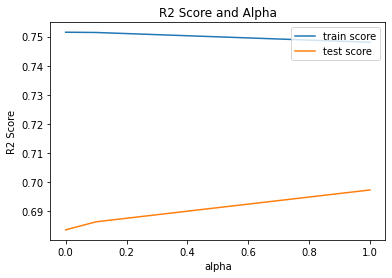

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.690633126594158
The MSE of the model on the test dataset for optimum alpha is 0.0045813968487033365


In [209]:
# ## On RFE filtered dataset

# Builsing a Ridge Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(x_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(x_train_rfe,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(x_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 15 candidates, totalling 165 fits


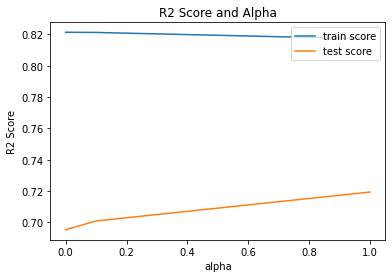

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.7517961186497641
The MSE of the model on the test dataset for optimum alpha is 0.0036756374958161067


In [210]:
# On Manually filtered dataset using VIF

# Building a Ridge Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(x_train_10, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(x_train_10,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(x_test_10)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

## Lasso Regression

Difference between Ridge and Lasso Regression is that Lasso also feature selection. That is, it makes some of the variables co-efficients zero.

Fitting 11 folds for each of 11 candidates, totalling 121 fits


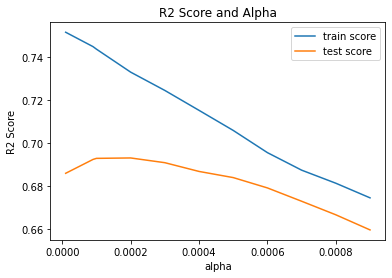

The optimum alpha is 0.0002
The R2 Score of the model on the test dataset for optimum alpha is 0.7042258253752529
The MSE of the model on the test dataset for optimum alpha is 0.004380103327275176


In [212]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(x_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(x_train_rfe,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(x_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

Fitting 11 folds for each of 15 candidates, totalling 165 fits


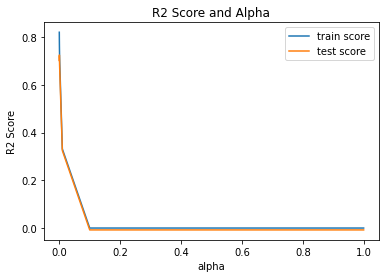

The optimum alpha is 0.0002
The R2 Score of the model on the test dataset for optimum alpha is 0.7662314016521267
The MSE of the model on the test dataset for optimum alpha is 0.003461866191445042


In [214]:
# Building a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(x_train_10, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(x_train_10,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(x_test_10)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))